# Линейная регрессия и стохастический градиентный спуск

Данное задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\frac{1}{\ell}\sum_{i=1}^\ell{{(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$w_0 \leftarrow w_0 + \frac{2\eta}{\ell} \sum_{i=1}^\ell{{(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}}$$
$$w_j \leftarrow w_j + \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$w_0 \leftarrow w_0 + \frac{2\eta}{\ell} {(y_i - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))}$$
$$w_j \leftarrow w_j + \frac{2\eta}{\ell} {x_{kj}(y_i - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, соответствующий целевому признаку, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$y = Xw$$
Домножением слева на $X^T$ получаем:
$$X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

----

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице курса на Coursera.org.

In [1]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
adver_data = pd.read_csv('../data/advertising.csv')
adver_data.sample(5)

,TV,Radio,Newspaper,Sales
148,243.2,49.0,44.3,25.4
182,218.5,5.4,27.4,12.2
142,193.7,35.4,75.6,19.2
7,57.5,32.8,23.5,11.8
127,7.8,38.9,50.6,6.6


In [3]:
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
adver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Создайте массивы NumPy `X` из столбцов TV, Radio и Newspaper и `y` - из столбца Sales. Используйте атрибут `values` объекта pandas DataFrame.**

In [5]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values
y = adver_data['Sales'].values

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение.**

In [6]:
means, stds = X.mean(axis=0), X.std(axis=0)
X = (X - means) / stds

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [15]:
X = np.hstack((np.ones(X.shape[0]), X[:, 0], X[:, 1], X[:, 2])).reshape((200, 4), order='F')

------

**2. Реализуйте функцию `mserror` - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения).**

In [17]:
def mserror(y, y_pred):
    return sum([(y_i - y_pred_i) ** 2 for y_i, y_pred_i in zip(y, y_pred)])

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [18]:
answer1 = mserror(pd.Series(y), pd.Series([adver_data['Sales'].median()] * y.shape[0])) 
print(answer1)

5669.15


------

**3. Реализуйте функцию `normal_equation, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [19]:
def normal_equation(X, y):
    weights = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y)
    return weights

In [20]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [21]:
answer2 = pd.Series([np.dot(norm_eq_weights, x) for x in X], index=[i for i in range(1, 201)])
print(answer2)

1      20.523974
2      12.337855
3      12.307671
4      17.597830
5      13.188672
         ...    
196     5.370342
197     8.165312
198    12.785921
199    23.767321
200    15.173196
Length: 200, dtype: float64


-------

**4. Напишите функцию `linear_prediction`, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [22]:
def linear_prediction(X, w):
    return np.array([np.dot(norm_eq_weights, x) for x in X])

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [24]:
answer3 = mserror(y, linear_prediction(X, normal_equation(X, y)))
print(answer3)

556.8252629021871


**5. Напишите функцию `stochastic_gradient_step`, реализующую шаг стохастического градиентного спуска для линейной регрессии.**

Функция должна принимать матрицу `X`, вектора `y` и `w`, число *$\eta$* (eta) - шаг градиентного спуска (пусть по умолчанию `eta=0.01`), а также число `train_ind` - индекс объекта обучающей выборки (строки матрицы `X`), по которому считается изменение весов. Результатом будет вектор обновленных весов.

In [25]:
def stochastic_gradient_step(X, y, w, eta, train_ind):
    container = []
    for w_i in range(w.shape[0]):
        inter = w[w_i] + X[train_ind, w_i] * (2 * eta / X.shape[0]) * (y[train_ind] - X[train_ind].dot(w))
        container.append(inter)
    return np.array(container)

------

**6. Напишите функцию `stochastic_gradient_descent`, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- `X` - матрица, соответствующая обучающей выборке
- `y` - вектор значений целевого признака
- `w_init` - вектор начальных весов модели
- `stochastic` - флаг, соответствующий варианту градиентного спуска - стохастическому или нет (по умолчанию `False`)
- `eta` - шаг градиентного спуска (по умолчанию 0.01)
- `max_iter` - максимальное число итераций градиентного спуска (по умолчанию 10000)
- `max_weight_dist` - минимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска, при котором алгоритм прекращает работу (по умолчанию `1e-8`)
- `verbose` - флаг печати информации (например, для отладки, по умолчанию `False`)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [26]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4, 
                     min_weight_dist=1e-8,
                     seed=42, verbose=False):
    
    weight_dist = np.inf
    w = w_init
    errors = []
    iter_num = 0
    np.random.seed(seed)
    
    if eta == 'D':
        eta = 1 / (iter_num + 1)
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        random_ind = np.random.randint(X.shape[0])
        
        new_w = stochastic_gradient_step(X, y, w, eta, random_ind)
        error = (y[random_ind] - X[random_ind].dot(new_w)) ** 2
        
        errors.append(error)
        weight_dist = np.linalg.norm(new_w - w)
        iter_num += 1
        w = new_w
    
    if verbose: print (w)
    
    return w, errors

 **Запустите $10^5$ (!) итераций стохастического градиентного спуска. Используйте длину шага $\eta$=0.01 и вектор начальных весов, состоящий из нулей.**

In [37]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.zeros(X.shape[1]), max_iter=1e5)

Wall time: 4.1 s


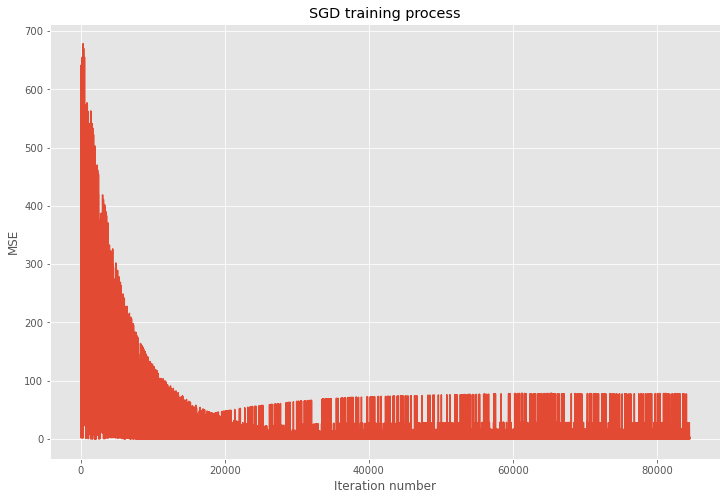

In [38]:
plt.plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.title('SGD training process')
plt.show()

**Посмотрим на вектор весов, к которому сошелся метод.**

In [39]:
stoch_grad_desc_weights

array([ 1.40190566e+01,  3.91069256e+00,  2.78209808e+00, -8.10462217e-03])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [40]:
stoch_errors_by_iter[-1]

6.35465548092096e-10

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [43]:
answer4 = mserror(y, linear_prediction(X, stoch_grad_desc_weights))
print(answer4)

556.8252629021872
